In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=42a9923d70aefe34f3176215ca6aab8975735b869fbe009753f049305bc3ad14
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
pip install pandas-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7238 sha256=ac85c0139b9e23df482f40aeb29acf2dbf98fd012863916576aa74aed4c4b257
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [ ]:
pip install numpy

Menginstall Spark dan Membuat Session

In [ ]:
# Mengimport library yang dibutuhkan
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyspark.sql.functions import col, collect_list, desc, max
from pyspark.sql.types import DoubleType
from pyspark.sql.window import Window
from pyspark.sql.functions import col, isnan, when

# Membuat Spark Session
appName = "Project_UAS_BigData"
spark = SparkSession.builder.appName(appName).config("spark.some.config.option","some-value").getOrCreate()

In [ ]:
# Load dataset
df = spark.read.format("csv").option("header", "true").load('/content/indonesian_movies.csv')
df.show(n=2000)

+--------------------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               title|year|         description|               genre|              rating|        users_rating|               votes|           languages|           directors|              actors|             runtime|
+--------------------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| #FriendButMarried 2|2020|Ayudia (Mawar De ...|           Biography|                 13+|                 6.5|                 120|          Indonesian|       Rako Prijanto|['Adipati Dolken'...|             100 min|
|            4 Mantan|2020|Sara, Airin, Rach...|            Thriller|                 17+|                 6.4|                   8|

In [ ]:
# Membersihkan data null
df_cleaned = df.dropna()

In [ ]:
# Jumlah data setelah dibersihkan
print("Jumlah data setelah membersihkan null: ", df_cleaned.count())

Jumlah data setelah membersihkan null:  292


In [ ]:
df_cleaned.show(truncate=False)
df.show(n=2000)

+-------------------------------------+----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+------+------------+-----+----------+-------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|title                                |year|description                                                                                                                                                                                                                                    |genre    |rating|users_rating|votes|languages |directors        

In [ ]:
# Menghitung jumlah film per director
director_counts = df.groupBy("directors").count().alias("film_count")

# Menampilkan 10 director dengan film terbanyak
top_directors = director_counts.orderBy(desc("count")).limit(10)

# Persiapan data untuk clustering
assembler = VectorAssembler(inputCols=["count"], outputCol="features")
vector_df = assembler.transform(top_directors)

# Melakukan clustering dengan K-Means
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(vector_df)

# Mendapatkan hasil clustering
clustered_df = model.transform(vector_df)

# Menampilkan hasil
clustered_df.show()

+--------------------+-----+--------+----------+
|           directors|count|features|prediction|
+--------------------+-----+--------+----------+
|    Nayato Fio Nuala|   60|  [60.0]|         1|
|     Rizal Mantovani|   33|  [33.0]|         2|
|    Hanung Bramantyo|   31|  [31.0]|         2|
|              Arizal|   28|  [28.0]|         2|
|Sisworo Gautama P...|   22|  [22.0]|         0|
|          Monty Tiwa|   22|  [22.0]|         0|
|       Findo Purwono|   21|  [21.0]|         0|
|       Jose Poernomo|   20|  [20.0]|         0|
|       Rako Prijanto|   20|  [20.0]|         0|
|      Rudy Soedjarwo|   20|  [20.0]|         0|
+--------------------+-----+--------+----------+



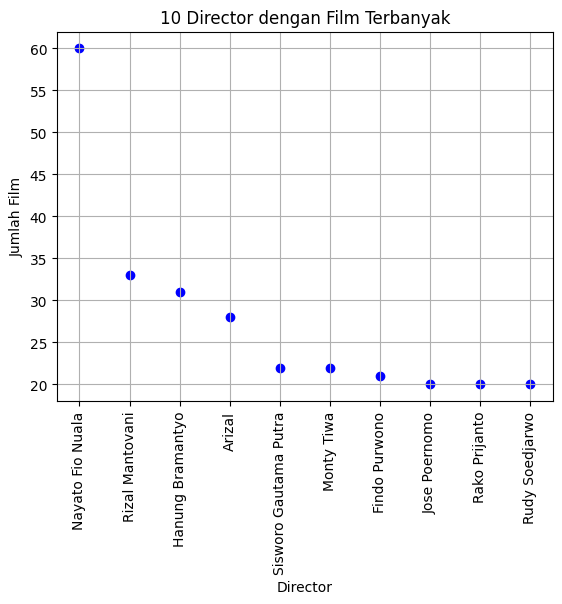

In [ ]:
top_directors_df = top_directors.toPandas()
plt.scatter(top_directors_df['directors'], top_directors_df['count'], marker='o', color='b')
plt.xlabel('Director')
plt.ylabel('Jumlah Film')
plt.title('10 Director dengan Film Terbanyak')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
top_directors.show()

+--------------------+-----+
|           directors|count|
+--------------------+-----+
|    Nayato Fio Nuala|   60|
|     Rizal Mantovani|   33|
|    Hanung Bramantyo|   31|
|              Arizal|   28|
|Sisworo Gautama P...|   22|
|          Monty Tiwa|   22|
|       Findo Purwono|   21|
|       Jose Poernomo|   20|
|       Rako Prijanto|   20|
|      Rudy Soedjarwo|   20|
+--------------------+-----+



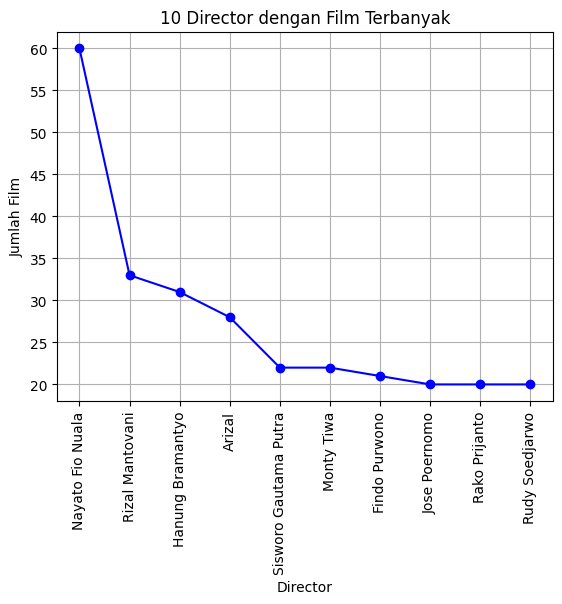

In [ ]:
# Menampilkan grafik linear
top_directors_df = top_directors.toPandas()
plt.plot(top_directors_df['directors'], top_directors_df['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Director')
plt.ylabel('Jumlah Film')
plt.title('10 Director dengan Film Terbanyak')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# Menghitung jumlah film per director
director_counts = df.groupBy("directors").count().orderBy("count", ascending=False).limit(10)

# Memilih 10 director teratas dengan film terbanyak
top_directors = [row.directors for row in director_counts.collect()]

# Filter data untuk top director
filtered_data = df.filter(df.directors.isin(top_directors))

# Memilih kolom untuk clustering
features = ["rating", "votes"]
filtered_data = filtered_data.select(features)

# Assemble features kedalam kolom vector
assembler = VectorAssembler(inputCols=features, outputCol="features")
filtered_data = assembler.transform(filtered_data)

# Clustering menggunakan K-Means
kmeans = KMeans(k=3, seed=42)
model = kmeans.fit(filtered_data)

# Menetapkan label cluster ke data point
predictions = model.transform(filtered_data)

# Convert predictions ke Pandas DataFrame
predictions_df = predictions.toPandas()

# Menampilkan Scatter plot
plt.figure(figsize=(10, 6))
colors = ["red", "blue", "green"]

for i, director in enumerate(top_directors):
    director_data = predictions_df[predictions_df["directors"] == director]
    plt.scatter(director_data["rating"], director_data["votes"], color=colors[i], label=director)

plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Scatter Plot of Top 10 Directors with the Most Movies")
plt.legend()
plt.show()

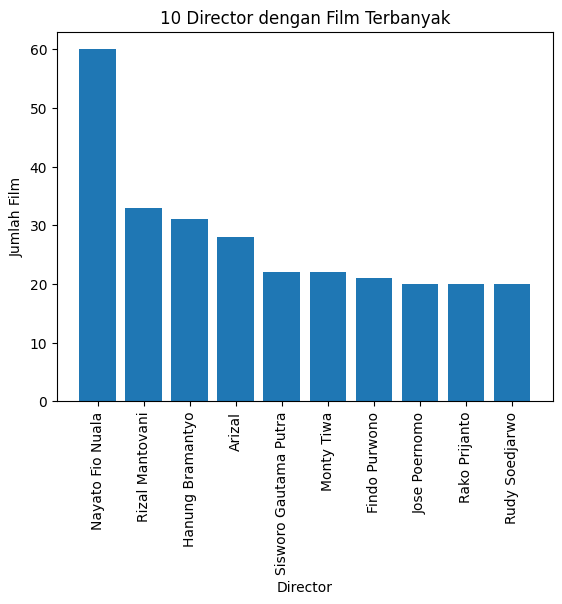

In [ ]:
# Menampilkan grafik batang
top_directors_df = top_directors.toPandas()
plt.bar(top_directors_df['directors'], top_directors_df['count'])
plt.xlabel('Director')
plt.ylabel('Jumlah Film')
plt.title('10 Director dengan Film Terbanyak')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Melakukan select kolom
df = df.select("title", "directors", "genre")
df.show()

+--------------------+--------------------+---------+
|               title|           directors|    genre|
+--------------------+--------------------+---------+
| #FriendButMarried 2|       Rako Prijanto|Biography|
|            4 Mantan|       Hanny Saputra| Thriller|
|Aku Tahu Kapan Ka...|   Hadrah Daeng Ratu|   Horror|
|         Anak Garuda|        Faozan Rizal|Adventure|
|           Dignitate|        Fajar Nugros|    Drama|
|     Guru-Guru Gokil|Sammaria Simanjuntak|   Comedy|
|Hunter in the Blu...|       Rako Prijanto|Biography|
|               Janin|        Ook Budiyono|   Horror|
|          Mangkujiwo|   Azhar Kinoi Lubis|   Horror|
|            Mariposa|       Fajar Bustomi|    Drama|
|May the Devil Tak...|      Timo Tjahjanto|   Horror|
|               Milea|           Pidi Baiq|    Drama|
|Nanti Kita Cerita...|Angga Dwimas Saso...|    Drama|
|           Nikah Yuk|   Adhe Dharmastriya|    Drama|
|             Rasuk 2|     Rizal Mantovani|   Horror|
| Si Doel the Movie 3|      

In [ ]:
# Melakukan pengelompokkan berdasarkan kolom directors dan genre
director_genre_count = df.groupBy("directors", "genre").count()

In [ ]:
# Mengurutkan data berdasarkan asc kolom genre dan desc kolom count
director_genre_count = director_genre_count.orderBy(col("genre"), col("count").desc())

In [ ]:
# Mengelompokkan dan agg data berdasarkan genre
director_genre_rank = director_genre_count.groupBy("genre").agg(
    collect_list("directors").alias("directors"),
    max(col("count")).alias("film_count")
).withColumnRenamed("directors", "top_director")

# Memilih genre untuk menampilkan director dengan film terbanyak
selected_genre = "Drama"  # Ganti dengan genre yang diinginkan

selected_directors = director_genre_rank.filter(col("genre") == selected_genre).select("top_director")

selected_directors.show()

+--------------------+
|        top_director|
+--------------------+
|[Nayato Fio Nuala...|
+--------------------+

